In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import cm
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np

C:\Users\tanth\Anaconda3\envs\maclearning\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
plt.style.use('seaborn-dark')
# plt.rcParams.update({
#     "lines.color": "white",
#     "patch.edgecolor": "white",
#     "text.color": "black",
#     "axes.facecolor": "white",
#     "axes.edgecolor": "lightgray",
#     "axes.labelcolor": "white",
#     "xtick.color": "white",
#     "ytick.color": "white",
#     "grid.color": "lightgray",
#     "figure.facecolor": "black",
#     "figure.edgecolor": "black",
#     "savefig.facecolor": "black",
#     "savefig.edgecolor": "black",
#     "text.color": "white"})

In [4]:
excel_raw_df = pd.read_excel('Job Applications 2019-2020.xlsx', header=1)

In [5]:
excel_raw_df.head()

,Date,Country,Company,Position,Follow-Up,Online,On-Site,Virtual,Phone,Video,...,No Reply,Rejected,Stopped Pursuing,Superceded,Offer,Offer Accepted,End Date,Process Duration (Days),Days Since Application,Outstanding Work
0,2019-12-28,Malaysia,Accenture,Consulting Analyst,x,NaN,NaN,x,x,NaN,...,NaN,NaN,x,NaN,NaN,NaN,2020-02-20,54.0,NaN,NaN
1,2019-12-28,Malaysia,Accenture,Software Engineering Analyst,NaN,NaN,NaN,x,NaN,NaN,...,NaN,NaN,x,NaN,NaN,NaN,2020-02-20,54.0,NaN,NaN
2,2019-12-28,Malaysia,Accenture,ASEAN Accenture Strategy Graduate,NaN,NaN,NaN,NaN,NaN,NaN,...,x,NaN,NaN,NaN,NaN,NaN,NaT,NaN,55.0,NaN
3,2019-12-28,Singapore,Accenture,Accenture Graduate Opportunities,NaN,NaN,NaN,x,NaN,NaN,...,NaN,x,NaN,NaN,NaN,NaN,2020-01-07,10.0,NaN,NaN
4,2019-12-28,Malaysia,Astro,Astro Graduate Programme - Technology Stream,NaN,NaN,NaN,NaN,NaN,NaN,...,x,NaN,NaN,NaN,NaN,NaN,NaT,NaN,55.0,NaN


In [6]:
excel_raw_df.dtypes

Date                       datetime64[ns]
Country                            object
Company                            object
Position                           object
Follow-Up                          object
Online                             object
On-Site                            object
Virtual                            object
Phone                              object
Video                              object
On-Site2                           object
No Reply                           object
Rejected                           object
Stopped Pursuing                   object
Superceded                         object
Offer                              object
Offer Accepted                     object
End Date                   datetime64[ns]
Process Duration (Days)           float64
Days Since Application            float64
Outstanding Work                  float64
dtype: object

In [7]:
excel_df = excel_raw_df.rename(columns={'Follow-Up':'Follow-Up Email/Call',
                                        'Online':'Online Assessment',
                                        'On-Site':'On-Site Assessment',
                                        'Virtual':'Virtual Interview',
                                        'Phone':'Phone Interview',
                                        'Video':'Video Interview',
                                        'On-Site2':'On-Site Interview'})
excel_df.drop('Outstanding Work', axis=1, inplace=True)
excel_df.head()

,Date,Country,Company,Position,Follow-Up Email/Call,Online Assessment,On-Site Assessment,Virtual Interview,Phone Interview,Video Interview,On-Site Interview,No Reply,Rejected,Stopped Pursuing,Superceded,Offer,Offer Accepted,End Date,Process Duration (Days),Days Since Application
0,2019-12-28,Malaysia,Accenture,Consulting Analyst,x,NaN,NaN,x,x,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,2020-02-20,54.0,NaN
1,2019-12-28,Malaysia,Accenture,Software Engineering Analyst,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,2020-02-20,54.0,NaN
2,2019-12-28,Malaysia,Accenture,ASEAN Accenture Strategy Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaT,NaN,55.0
3,2019-12-28,Singapore,Accenture,Accenture Graduate Opportunities,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,2020-01-07,10.0,NaN
4,2019-12-28,Malaysia,Astro,Astro Graduate Programme - Technology Stream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaT,NaN,55.0


In [8]:
companies_df = excel_df.groupby(['Company','Country']).count()
companies_df.head(10)

Date  Position  Follow-Up Email/Call  \
Company           Country                                           
Accenture         Malaysia      4         4                     1   
                  Singapore     1         1                     0   
Astro             Malaysia      1         1                     0   
Axiata            Malaysia      1         1                     0   
CIMB              Malaysia      1         1                     0   
Cisco             Malaysia      1         1                     0   
Cognizant         Malaysia      1         1                     0   
                  Singapore     1         1                     0   
Dassault Systemes Malaysia      2         2                     1   
Deloitte          Malaysia      1         1                     0   

                             Online Assessment  On-Site Assessment  \
Company           Country                                            
Accenture         Malaysia                   0                   0   
                  Singapore                  0                   0   
Astro             Malaysia                   0                   0   
Axiata            Malaysia                   0                   0   
CIMB              Malaysia                   1                   0   
Cisco             Malaysia                   0                   0   
Cognizant         Malaysia                   1                   0   
                  Singapore                  0                   0   
Dassault Systemes Malaysia                   1                   1   
Deloitte          Malaysia                   0                   0   

                             Virtual Interview  Phone Interview  \
Company           Country                                         
Accenture         Malaysia                   3                1   
                  Singapore                  1                0   
Astro             Malaysia                   0                0   
Axiata            Malaysia                   0                0   
CIMB              Malaysia                   0                0   
Cisco             Malaysia                   1                0   
Cognizant         Malaysia                   0                0   
                  Singapore                  0                0   
Dassault Systemes Malaysia                   0                1   
Deloitte          Malaysia                   0                0   

                             Video Interview  On-Site Interview  No Reply  \
Company           Country                                                   
Accenture         Malaysia                 0                  0         1   
                  Singapore                0                  0         0   
Astro             Malaysia                 0                  0         1   
Axiata            Malaysia                 0                  0         1   
CIMB              Malaysia                 0                  0         1   
Cisco             Malaysia                 0                  0         0   
Cognizant         Malaysia                 0                  0         1   
                  Singapore                0                  0         1   
Dassault Systemes Malaysia                 0                  0         0   
Deloitte          Malaysia                 0                  0         1   

                             Rejected  Stopped Pursuing  Superceded  Offer  \
Company           Country                                                    
Accenture         Malaysia          0                 3           0      0   
                  Singapore         1                 0           0      0   
Astro             Malaysia          0                 0           0      0   
Axiata            Malaysia          0                 0           0      0   
CIMB              Malaysia          0                 0           0      0   
Cisco             Malaysia          0                 1           0      0   
Cogni

In [9]:
companies_total = companies_df.shape[0]
applications_total = excel_df.shape[0]
print(f'Total applications sent: {applications_total}\nTotal companies applied to: {companies_total}')

Total applications sent: 29
Total companies applied to: 23


In [10]:
outcome_cols = ['No Reply','Superceded','Stopped Pursuing','Rejected','Offer','Offer Accepted']
time_df = excel_df[['Date','End Date','Process Duration (Days)'] + outcome_cols]
time_df.sort_values(by=['Date'] + outcome_cols , inplace=True)
time_df.head(10)

C:\Users\tanth\Anaconda3\envs\maclearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Date,End Date,Process Duration (Days),No Reply,Superceded,Stopped Pursuing,Rejected,Offer,Offer Accepted
2,2019-12-28,NaT,NaN,x,NaN,NaN,NaN,NaN,NaN
4,2019-12-28,NaT,NaN,x,NaN,NaN,NaN,NaN,NaN
7,2019-12-28,NaT,NaN,x,NaN,NaN,NaN,NaN,NaN
5,2019-12-28,2020-01-17,20.0,NaN,x,NaN,NaN,NaN,NaN
0,2019-12-28,2020-02-20,54.0,NaN,NaN,x,NaN,NaN,NaN
1,2019-12-28,2020-02-20,54.0,NaN,NaN,x,NaN,NaN,NaN
8,2019-12-28,2020-02-20,54.0,NaN,NaN,x,NaN,NaN,NaN
3,2019-12-28,2020-01-07,10.0,NaN,NaN,NaN,x,NaN,NaN
6,2019-12-28,2020-02-13,47.0,NaN,NaN,NaN,NaN,x,NaN
9,2019-12-29,NaT,NaN,x,NaN,NaN,NaN,NaN,NaN


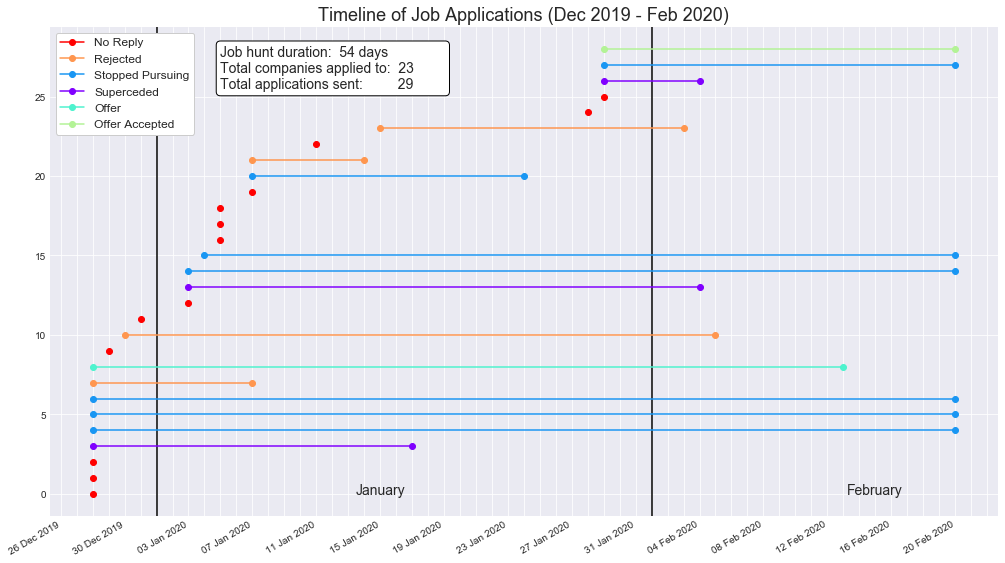

In [11]:
fig, ax = plt.subplots(1,1, figsize=(17,10))

cmap = cm.get_cmap('rainbow', len(outcome_cols))

for count, date, index in zip(range(len(time_df.index)), time_df['Date'], time_df.index):
    if time_df.loc[index, 'Superceded'] == 'x':
        color_index = 0
    elif time_df.loc[index, 'Stopped Pursuing'] == 'x':
        color_index = 1
    elif time_df.loc[index, 'Offer'] == 'x' and time_df.loc[index, 'Offer Accepted'] != 'x':
        color_index = 2
    elif time_df.loc[index, 'Offer Accepted'] == 'x':
        color_index = 3
    elif time_df.loc[index, 'Rejected'] == 'x':
        color_index = 4
    else:
        ax.plot_date(date, count, marker='o', color=cmap(5))
        continue
    
    ax.plot_date(date, count, color=cmap(color_index))
    ax.plot_date(time_df.loc[index, 'End Date'], count, color=cmap(color_index))
    ax.plot([date, time_df.loc[index, 'End Date']], [count]*2, color=cmap(color_index))
    
ax.xaxis.set_major_locator(mdates.DayLocator(interval=4))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))
fig.autofmt_xdate()

bottom, top = ax.get_ylim()
ax.set_ylim((bottom,top))
month_starts = [pd.Timestamp('2020-01-01'), pd.Timestamp('2020-02-01')]
ax.vlines(month_starts, bottom, top)
month_mids = [pd.Timestamp('2020-01-15'), pd.Timestamp('2020-02-15')]
for mid, month in zip(month_mids, ['January', 'February']):
    ax.text(mid, 0, month, fontsize=14, ha='center')

color_index_seq = [5,4,1,0,2,3]
legend_elements = [Line2D([0], [0], marker='o', color=cmap(color_index)) for color_index in color_index_seq]
legend_labels = ['No Reply','Rejected','Stopped Pursuing','Superceded','Offer','Offer Accepted']
ax.legend(legend_elements, legend_labels, fontsize=12, facecolor='white', frameon=True, framealpha=1)

props = dict(boxstyle='round', facecolor='white', alpha=1)
ax.text(time_df.loc[16,'Date'], 25.5, 
        f'Job hunt duration: {54:3} days\
        \nTotal companies applied to: {companies_total:3}\
        \nTotal applications sent: {applications_total:10}', 
        fontsize=14, bbox=props)

ax.set_title('Timeline of Job Applications (Dec 2019 - Feb 2020)', fontsize=18)
ax.grid(which='both')

plt.show()

In [12]:
counts = companies_df.sum(axis=0)
outcome_counts = counts[legend_labels]
outcome_counts.drop('Offer Accepted', inplace=True)
outcome_counts

No Reply            13
Rejected             4
Stopped Pursuing     7
Superceded           3
Offer                2
dtype: int64

In [13]:
reject_mean_duration = excel_df[excel_df['Rejected'].notnull()]['Process Duration (Days)'].mean()
stop_mean_duration = excel_df[excel_df['Stopped Pursuing'].notnull()]['Process Duration (Days)'].mean()
supercede_mean_duration = excel_df[excel_df['Superceded'].notnull()]['Process Duration (Days)'].mean()
offer_mean_duration = excel_df[excel_df['Offer'].notnull()]['Process Duration (Days)'].mean()
print(f'Mean duration (days):\nRejection: {reject_mean_duration:.2f}\
      \nStopped pursuing: {stop_mean_duration:.2f}\
      \nSuperceded: {supercede_mean_duration:.2f}\
      \nOffer: {offer_mean_duration:.2f}'
     )

offer_durations = excel_df[excel_df['Offer'].notnull()]['Process Duration (Days)']

Mean duration (days):
Rejection: 18.25      
Stopped pursuing: 42.29      
Superceded: 19.33      
Offer: 34.50


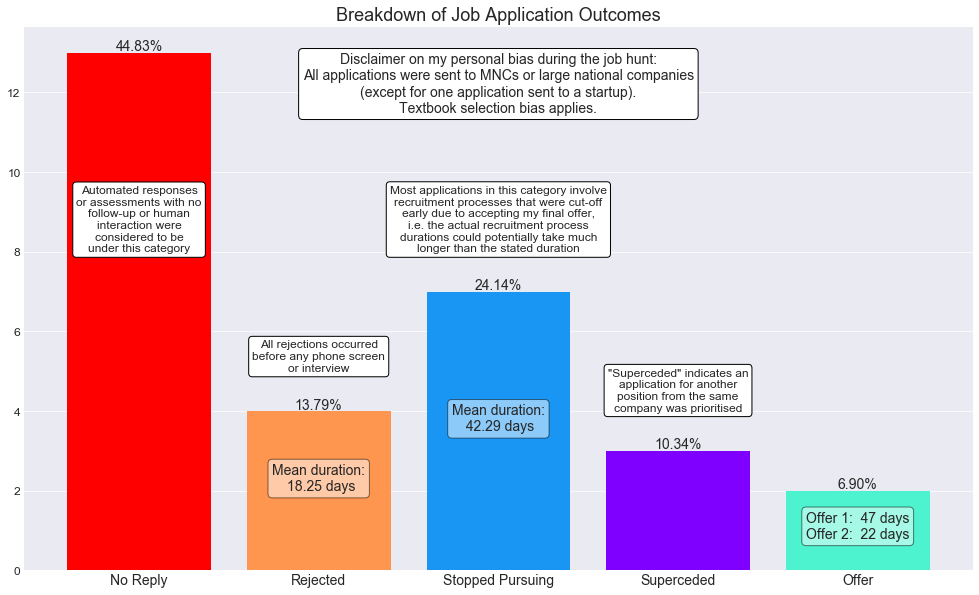

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(17,10))

ax.bar(outcome_counts.keys(), outcome_counts, color=cmap(color_index_seq))

for patch in ax.patches:
    width, height = patch.get_width(), patch.get_height()
    x, y = patch.get_xy() 
    ax.annotate(f'{height/applications_total*100:3.2f}%', 
                (x + .5*width, y + height + 0.05), 
                ha='center', fontsize=14)

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
props_info = {'boxstyle':'round', 'facecolor':'white', 'alpha':1}
ax.text(2, 11.5, f'Disclaimer on my personal bias during the job hunt:\
\nAll applications were sent to MNCs or large national companies\n(except for one application sent to a startup).\
\nTextbook selection bias applies.', 
        ha='center', fontsize=14, bbox=props_info)
ax.text(0, 8, f'Automated responses\nor assessments with no\nfollow-up or human\ninteraction were\
\nconsidered to be\nunder this category', 
        ha='center', fontsize=12, bbox=props_info)
ax.text(1, 2, f'Mean duration:\n {reject_mean_duration:.2f} days', ha='center', fontsize=14, bbox=props)
ax.text(1, 5, f'All rejections occurred\nbefore any phone screen\nor interview', 
        ha='center', fontsize=12, bbox=props_info)
ax.text(2, 3.5, f'Mean duration:\n {stop_mean_duration:.2f} days', ha='center', fontsize=14, bbox=props)
ax.text(2, 8, f'Most applications in this category involve\nrecruitment processes that were cut-off\
\nearly due to accepting my final offer,\ni.e. the actual recruitment process\
\ndurations could potentially take much\nlonger than the stated duration', 
        ha='center', fontsize=12, bbox=props_info)
ax.text(3, 4, f'"Superceded" indicates an\napplication for another\nposition from the same\ncompany was prioritised', 
        ha='center', fontsize=12, bbox=props_info)
ax.text(4, 0.8, f'Offer 1:  {int(offer_durations.iloc[0])} days\
\nOffer 2:  {int(offer_durations.iloc[1])} days', ha='center', fontsize=14, bbox=props)

plt.setp(ax.xaxis.get_majorticklabels(), fontsize=14)
plt.setp(ax.yaxis.get_majorticklabels(), fontsize=12)
ax.set_title('Breakdown of Job Application Outcomes', fontsize=18)
ax.grid(axis='y')

plt.show()

In [15]:
rejected = excel_df[excel_df['Rejected'].notnull()][['Rejected']]
stopped = excel_df[excel_df['Stopped Pursuing'].notnull()][['Stopped Pursuing']]
offer = excel_df[excel_df['Offer'].notnull()][['Offer']]

duration_df = rejected.join(stopped, how='outer').join(offer, how='outer')
duration_df = duration_df.join(excel_df['Process Duration (Days)'], how='left')
duration_df

,Rejected,Stopped Pursuing,Offer,Process Duration (Days)
0,NaN,x,NaN,54.0
1,NaN,x,NaN,54.0
3,x,NaN,NaN,10.0
6,NaN,NaN,x,47.0
8,NaN,x,NaN,54.0
10,x,NaN,NaN,37.0
13,NaN,x,NaN,48.0
15,NaN,x,NaN,47.0
19,NaN,x,NaN,17.0
21,x,NaN,NaN,7.0


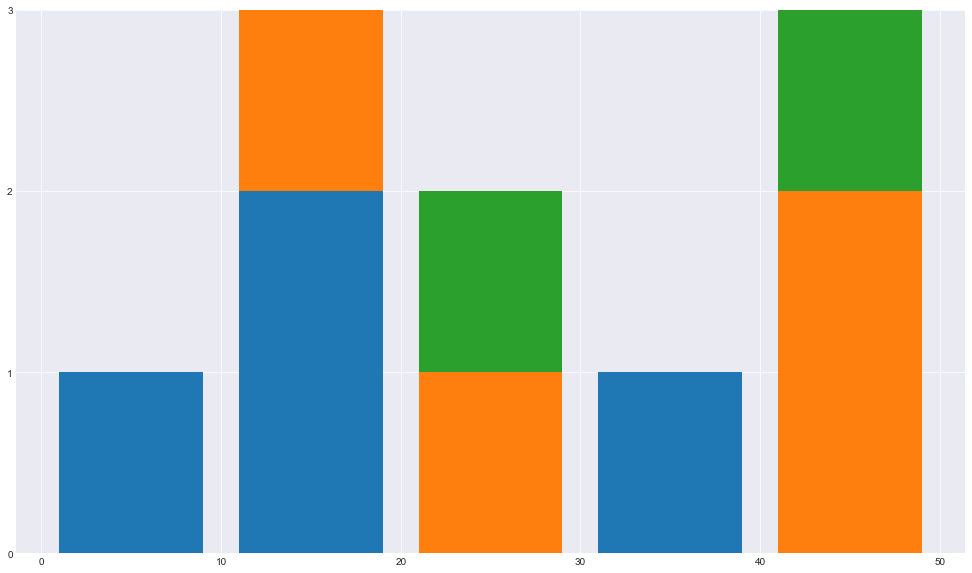

In [16]:
fig, ax = plt.subplots(1,1,figsize=(17,10))
bins = list(range(0,60,10))
hist_data = [duration_df.loc[duration_df['Rejected']=='x']['Process Duration (Days)'],
             duration_df.loc[duration_df['Stopped Pursuing']=='x']['Process Duration (Days)'],
             duration_df.loc[duration_df['Offer']=='x']['Process Duration (Days)']
]
ax.hist(hist_data, bins=bins, stacked=True, rwidth=0.8)
ax.set_yticks(range(0,4,1))
plt.grid()
plt.show()

In [17]:
method_cols = ['Online Assessment',
               'On-Site Assessment',
               'Virtual Interview',
               'Phone Interview',
               'Video Interview',
               'On-Site Interview'
              ]

method_df = companies_df[method_cols]

for method_col in method_cols:
    method_df.loc[method_df[method_col] > 1, method_col] = 1

method_counts = method_df.sum()
method_counts

C:\Users\tanth\Anaconda3\envs\maclearning\lib\site-packages\pandas\core\indexing.py:964: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Online Assessment     5
On-Site Assessment    2
Virtual Interview     4
Phone Interview       4
Video Interview       1
On-Site Interview     1
dtype: int64

In [18]:
method_df = method_df[(method_df['Online Assessment'] != 0)
          | (method_df['On-Site Assessment'] != 0)
          | (method_df['Virtual Interview'] != 0)
          | (method_df['Phone Interview'] != 0)
          | (method_df['Video Interview'] != 0)
          | (method_df['On-Site Interview'] != 0)
         ]
method_df

Online Assessment  On-Site Assessment  \
Company           Country                                            
Accenture         Malaysia                   0                   0   
                  Singapore                  0                   0   
CIMB              Malaysia                   1                   0   
Cisco             Malaysia                   0                   0   
Cognizant         Malaysia                   1                   0   
Dassault Systemes Malaysia                   1                   1   
EY                Malaysia                   0                   0   
IBM               Malaysia                   1                   0   
Nielsen           Malaysia                   0                   1   
Shopee            Malaysia                   1                   0   

                             Virtual Interview  Phone Interview  \
Company           Country                                         
Accenture         Malaysia                   1                1   
                  Singapore                  1                0   
CIMB              Malaysia                   0                0   
Cisco             Malaysia                   1                0   
Cognizant         Malaysia                   0                0   
Dassault Systemes Malaysia                   0                1   
EY                Malaysia                   0                1   
IBM               Malaysia                   0                0   
Nielsen           Malaysia                   1                1   
Shopee            Malaysia                   0                0   

                             Video Interview  On-Site Interview  
Company           Country                                        
Accenture         Malaysia                 0                  0  
                  Singapore                0                  0  
CIMB              Malaysia                 0                  0  
Cisco             Malaysia                 0                  0  
Cognizant         Malaysia                 0                  0  
Dassault Systemes Malaysia                 0                  0  
EY                Malaysia                 0                  1  
IBM               Malaysia                 0                  0  
Nielsen           Malaysia                 0                  0  
Shopee            Malaysia                 1                  0

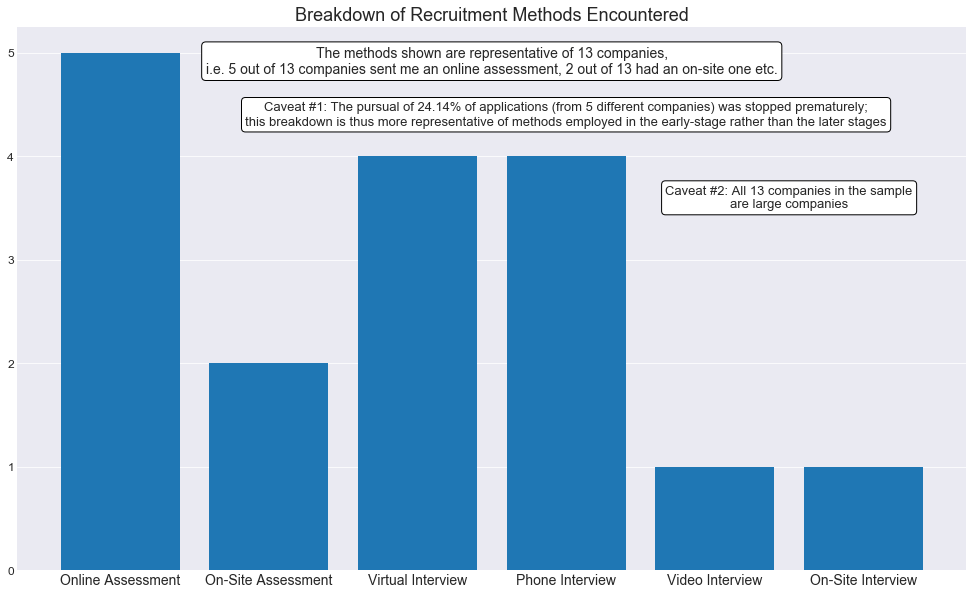

In [19]:
fig, ax = plt.subplots(1,1,figsize=(17,10))

ax.bar(method_counts.keys(), method_counts.values)

props_info = {'boxstyle':'round', 'facecolor':'white', 'alpha':1}
ax.text(2.5, 4.8, f'The methods shown are representative of 13 companies,\
\ni.e. 5 out of 13 companies sent me an online assessment, 2 out of 13 had an on-site one etc.', 
        ha='center', fontsize=14, bbox=props_info)

ax.text(3, 4.3, f'Caveat #1: The pursual of 24.14% of applications (from 5 different companies) was stopped prematurely;\
\nthis breakdown is thus more representative of methods employed in the early-stage rather than the later stages', 
        ha='center', fontsize=13, bbox=props_info)

ax.text(4.5, 3.5, f'Caveat #2: All 13 companies in the sample\nare large companies', 
        ha='center', fontsize=13, bbox=props_info)

plt.setp(ax.xaxis.get_majorticklabels(), fontsize=14)
plt.setp(ax.yaxis.get_majorticklabels(), fontsize=12)
ax.set_title('Breakdown of Recruitment Methods Encountered', fontsize=18)
ax.grid(axis='y')

plt.show()